# Complete Data Wrangling Tutorial with Correlations, 5-Year Population, and a Global Development Score

## Overview
In this tutorial, we'll **clean**, **merge**, **enrich**, and **analyze** two datasets:
- **`country_data.csv`**: Population, land area, density for 195 countries.
- **`country_gdp.csv`**: GDP (nominal, 2022), GDP growth, share of world GDP, etc., for 177 countries.

### What is the Global Development Score?
We'll **create** a synthetic metric called **Global Development Score**, which aims to:
1. Combine multiple indicators (e.g., **GDP**, **Corruption Index**, **HDI**, **Tax Revenue**, etc.) into **one** composite value.
2. Rank countries based on **overall development**—not just a single metric like GDP.
3. Provide a **theoretical example** of how real-world analysts might combine **diverse data** to get a **bigger picture** of development.

### Why Do We Care?
- A single measure (like GDP alone) can be **misleading** about living standards or governance.
- **Combining** multiple metrics (like **life expectancy**, **corruption levels**, and **HDI**) may yield a **more holistic** view of a nation's development.
- It’s **purely illustrative** but **mirrors** how real economists or researchers build **composite indexes** (e.g., **Human Development Index** by the UN).

### Our Plan
1. **Read** and **inspect** the raw CSVs.
2. **Clean** string-formatted columns and **handle** missing values.
3. **Merge** the datasets and **visualize** them.
4. **Generate 5-year population data** (2020–2024) for each country.
5. **Add** synthetic features (Corruption Index, HDI, etc.) **proportional** to GDP and population.
6. **Plot correlations** among key variables in a **heatmap**.
7. **Filter outliers** if needed (e.g., extreme GDP values).
8. **Compute** a **Global Development Score**:
   - Combine **HDI**, **Corruption Index**, **Tax Revenue** (%), and **GDP** in a single numeric formula.
   - Provide **theoretical weights** for each metric.
9. **Rank** countries by this new metric.
10. **Interpret** the final results to illustrate how a composite index can generate meaningful insights.

Let's begin our data-wrangling journey!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random

# A nicer style for plots
sns.set(style="whitegrid")

fake = Faker()
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Reading the Data
We have two files:
- `country_data.csv`: (195 countries)
- `country_gdp.csv`: (177 countries)

We'll **open** them as-is and **inspect** the raw data.

In [2]:
# Load raw CSVs (ensure they're in the same directory as this notebook)
country_data_raw = pd.read_csv("country_data.csv")
country_gdp_raw = pd.read_csv("country_gdp.csv")

print("=== RAW COUNTRY_DATA ===")
display(country_data_raw.head(5))
print(country_data_raw.info())

print("\n=== RAW COUNTRY_GDP ===")
display(country_gdp_raw.head(5))
print(country_gdp_raw.info())

=== RAW COUNTRY_DATA ===


,Country,Population (2024),Land Area(Km²),Density(P/Km²)
0,Afghanistan,"42,647,492","652,860",65
1,Albania,"2,791,765","27,400",102
2,Algeria,"46,814,308","2,381,740",20
3,Andorra,"81,938",470,174
4,Angola,"37,885,849","1,246,700",30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            195 non-null    object
 1   Population (2024)  195 non-null    object
 2   Land Area(Km²)     195 non-null    object
 3   Density(P/Km²)     195 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB
None

=== RAW COUNTRY_GDP ===


,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population -2022,GDP per capita,Share of World GDP
0,United States,"$25,462,700,000,000",$25.463 trillion,2.06%,"341,534,046","$74,554",25.32%
1,China,"$17,963,200,000,000",$17.963 trillion,2.99%,"1,425,179,569","$12,604",17.86%
2,Japan,"$4,231,140,000,000",$4.231 trillion,1.03%,"124,997,578","$33,850",4.21%
3,Germany,"$4,072,190,000,000",$4.072 trillion,1.79%,"84,086,227","$48,429",4.05%
4,India,"$3,385,090,000,000",$3.385 trillion,7.00%,"1,425,423,212","$2,375",3.37%


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              177 non-null    object
 1   GDP (nominal, 2022)  177 non-null    object
 2   GDP (abbrev.)        177 non-null    object
 3   GDP growth           177 non-null    object
 4   Population -2022     177 non-null    object
 5   GDP per capita       177 non-null    object
 6   Share of World GDP   177 non-null    object
dtypes: object(7)
memory usage: 9.8+ KB
None


We see **string-formatted** numeric columns (with commas, dollar signs, etc.). Let's clean them next.

## 2. Clean Each Dataset Separately
### 2.1 Cleaning `country_data.csv`

In [3]:
country_data = country_data_raw.copy()

# Identify likely numeric columns
columns_to_clean = [col for col in country_data.columns if "Population" in col or "Land Area" in col or "Density" in col]

for col in columns_to_clean:
    country_data[col] = country_data[col].astype(str).str.replace(",", "", regex=False)
    country_data[col] = pd.to_numeric(country_data[col], errors='coerce')

print("AFTER CLEANING country_data:")
display(country_data.head(5))
print(country_data.info())

AFTER CLEANING country_data:


,Country,Population (2024),Land Area(Km²),Density(P/Km²)
0,Afghanistan,42647492,652860,65
1,Albania,2791765,27400,102
2,Algeria,46814308,2381740,20
3,Andorra,81938,470,174
4,Angola,37885849,1246700,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            195 non-null    object
 1   Population (2024)  195 non-null    int64 
 2   Land Area(Km²)     195 non-null    int64 
 3   Density(P/Km²)     195 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ KB
None


### Quick Visualization: Top 5 Countries by Population (2024)
To confirm numeric conversion and see some immediate insight.

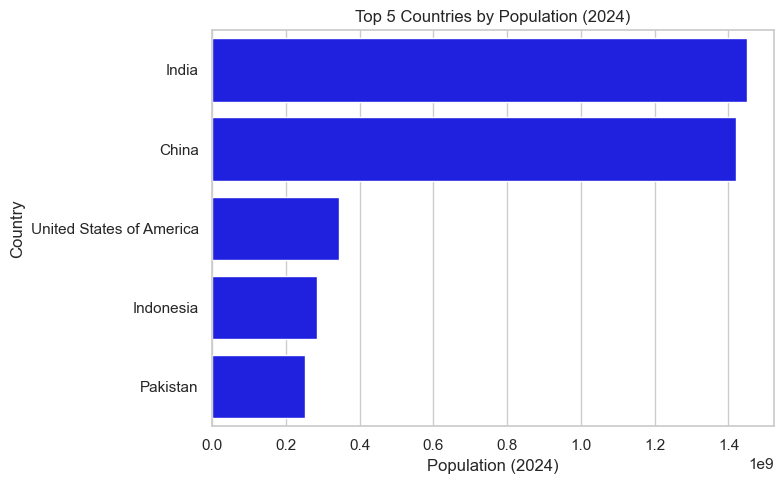

In [4]:
top5_pop = country_data.sort_values(by='Population (2024)', ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top5_pop['Population (2024)'],
    y=top5_pop['Country'],
    color='blue'  # single color
)
plt.title("Top 5 Countries by Population (2024)")
plt.xlabel("Population (2024)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### 2.2 Cleaning `country_gdp.csv`

In [5]:
country_gdp = country_gdp_raw.copy()

def clean_currency(value):
    if isinstance(value, str):
        value = (value.replace("$", "")
                      .replace(",", "")
                      .replace(" trillion", "e12")
                      .replace(" billion", "e9"))
    try:
        return float(value)
    except:
        return np.nan

# Possible currency columns
currency_cols = ["GDP (nominal, 2022)", "GDP per capita"]
for col in currency_cols:
    if col in country_gdp.columns:
        country_gdp[col] = country_gdp[col].apply(clean_currency)

# Share of World GDP => remove %
if 'Share of World GDP' in country_gdp.columns:
    country_gdp['Share of World GDP'] = country_gdp['Share of World GDP'].str.replace('%', '', regex=False)
    country_gdp['Share of World GDP'] = pd.to_numeric(country_gdp['Share of World GDP'], errors='coerce')
    country_gdp['Share of World GDP'] /= 100.0

# GDP growth => remove %
if 'GDP growth' in country_gdp.columns:
    country_gdp['GDP growth'] = country_gdp['GDP growth'].str.replace('%', '', regex=False)
    country_gdp['GDP growth'] = pd.to_numeric(country_gdp['GDP growth'], errors='coerce')
    country_gdp['GDP growth'] /= 100.0

# Population -2022 => remove commas
if 'Population -2022' in country_gdp.columns:
    country_gdp['Population -2022'] = country_gdp['Population -2022'].astype(str).str.replace(',', '', regex=False)
    country_gdp['Population -2022'] = pd.to_numeric(country_gdp['Population -2022'], errors='coerce')

print("AFTER CLEANING country_gdp:")
display(country_gdp.head(5))
print(country_gdp.info())

AFTER CLEANING country_gdp:


,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population -2022,GDP per capita,Share of World GDP
0,United States,2.546270e+13,$25.463 trillion,0.0206,341534046,74554.0,0.2532
1,China,1.796320e+13,$17.963 trillion,0.0299,1425179569,12604.0,0.1786
2,Japan,4.231140e+12,$4.231 trillion,0.0103,124997578,33850.0,0.0421
3,Germany,4.072190e+12,$4.072 trillion,0.0179,84086227,48429.0,0.0405
4,India,3.385090e+12,$3.385 trillion,0.0700,1425423212,2375.0,0.0337


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              177 non-null    object 
 1   GDP (nominal, 2022)  177 non-null    float64
 2   GDP (abbrev.)        177 non-null    object 
 3   GDP growth           177 non-null    float64
 4   Population -2022     177 non-null    int64  
 5   GDP per capita       177 non-null    float64
 6   Share of World GDP   177 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.8+ KB
None


#### Quick Visualization: Top 5 Countries by GDP (Nominal, 2022)

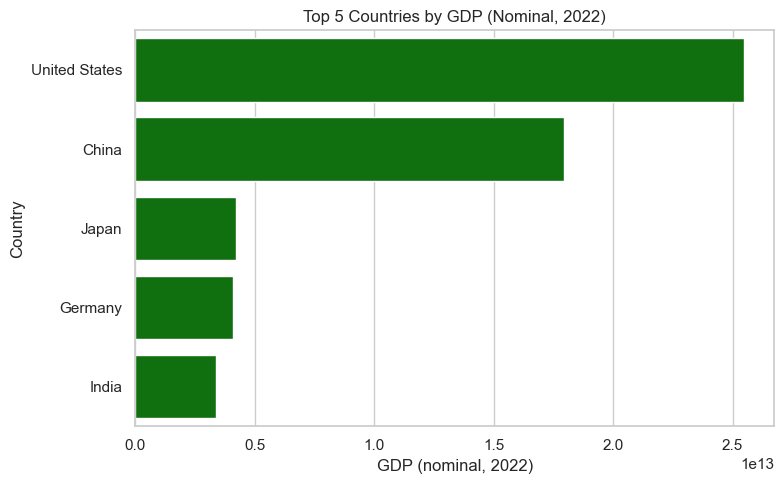

In [6]:
if "GDP (nominal, 2022)" in country_gdp.columns:
    highest_gdp = country_gdp.sort_values("GDP (nominal, 2022)", ascending=False).head(5)
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=highest_gdp["GDP (nominal, 2022)"],
        y=highest_gdp["Country"],
        color='green'
    )
    plt.title("Top 5 Countries by GDP (Nominal, 2022)")
    plt.xlabel("GDP (nominal, 2022)")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

## 3. Handling Missing Values
We’ll **inspect** missing values, then **decide** how to fill or drop them:
- Fill numeric columns in `country_data` with the **median**.
- Drop rows in `country_gdp` missing `GDP (nominal, 2022)` (because it’s **crucial** for our final analysis).
- Potentially drop columns if >50% missing.

We’ll **show** the updated dataset each time so users see the result.

In [7]:
print("Missing in country_data:")
display(country_data.isnull().sum())

print("Missing in country_gdp:")
display(country_gdp.isnull().sum())

# Fill numeric columns in country_data with median
numeric_cols_cd = [col for col in country_data.select_dtypes(include=[np.number]).columns]
for col in numeric_cols_cd:
    if country_data[col].isnull().sum() > 0:
        country_data[col].fillna(country_data[col].median(), inplace=True)

# If GDP (nominal, 2022) is missing, drop those rows
if 'GDP (nominal, 2022)' in country_gdp.columns:
    before = len(country_gdp)
    country_gdp.dropna(subset=['GDP (nominal, 2022)'], inplace=True)
    after = len(country_gdp)
    print(f"Dropped {before - after} rows missing 'GDP (nominal, 2022)'.")

# If 'GDP per capita' is mostly missing (>50%), drop the column
if 'GDP per capita' in country_gdp.columns:
    if country_gdp['GDP per capita'].isnull().mean() > 0.5:
        country_gdp.drop(columns=['GDP per capita'], inplace=True)
        print("Dropped 'GDP per capita' column (>50% missing).")

print("\nUpdated country_data:")
display(country_data.head(5))

print("\nUpdated country_gdp:")
display(country_gdp.head(5))

Missing in country_data:


Country              0
Population (2024)    0
Land Area(Km²)       0
Density(P/Km²)       0
dtype: int64

Missing in country_gdp:


Country                0
GDP (nominal, 2022)    0
GDP (abbrev.)          0
GDP growth             0
Population -2022       0
GDP per capita         0
Share of World GDP     0
dtype: int64

Dropped 0 rows missing 'GDP (nominal, 2022)'.

Updated country_data:


,Country,Population (2024),Land Area(Km²),Density(P/Km²)
0,Afghanistan,42647492,652860,65
1,Albania,2791765,27400,102
2,Algeria,46814308,2381740,20
3,Andorra,81938,470,174
4,Angola,37885849,1246700,30



Updated country_gdp:


,Country,"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population -2022,GDP per capita,Share of World GDP
0,United States,2.546270e+13,$25.463 trillion,0.0206,341534046,74554.0,0.2532
1,China,1.796320e+13,$17.963 trillion,0.0299,1425179569,12604.0,0.1786
2,Japan,4.231140e+12,$4.231 trillion,0.0103,124997578,33850.0,0.0421
3,Germany,4.072190e+12,$4.072 trillion,0.0179,84086227,48429.0,0.0405
4,India,3.385090e+12,$3.385 trillion,0.0700,1425423212,2375.0,0.0337


## 4. Merging the Datasets
Now let’s **merge** the two **cleaned** dataframes on `Country` using an **outer** join to keep track of any unmatched countries.
Then we **inspect** the merged result.

In [8]:
merged_df = pd.merge(country_data, country_gdp, on="Country", how="outer")

print("Merged Dataset Info:")
display(merged_df.info())
display(merged_df.head(5))

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              207 non-null    object 
 1   Population (2024)    195 non-null    float64
 2   Land Area(Km²)       195 non-null    float64
 3   Density(P/Km²)       195 non-null    float64
 4   GDP (nominal, 2022)  177 non-null    float64
 5   GDP (abbrev.)        177 non-null    object 
 6   GDP growth           177 non-null    float64
 7   Population -2022     177 non-null    float64
 8   GDP per capita       177 non-null    float64
 9   Share of World GDP   177 non-null    float64
dtypes: float64(8), object(2)
memory usage: 16.3+ KB


None

,Country,Population (2024),Land Area(Km²),Density(P/Km²),"GDP (nominal, 2022)",GDP (abbrev.),GDP growth,Population -2022,GDP per capita,Share of World GDP
0,Afghanistan,42647492.0,652860.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2791765.0,27400.0,102.0,1.888210e+10,$18.88 billion,0.0484,2827608.0,6678.0,0.0002
2,Algeria,46814308.0,2381740.0,20.0,1.919130e+11,$192 billion,0.0310,45477389.0,4220.0,0.0019
3,Andorra,81938.0,470.0,174.0,3.352033e+09,$3.35 billion,0.0881,79705.0,42055.0,0.0000
4,Angola,37885849.0,1246700.0,30.0,1.067140e+11,$107 billion,0.0305,35635029.0,2995.0,0.0011


## 5. Generating 5-year Population Data
We'll create synthetic columns **`Pop_2020`..`Pop_2024`** using existing population columns if available, otherwise a random baseline. This helps illustrate **multi-year** data usage.

In [9]:
def generate_5yr_population_data(df, start_year=2020, end_year=2024):
    """
    Generate synthetic population data for each country from start_year to end_year.
    If 'Population (2024)' or 'Population -2022' is available, use it as a baseline;
    otherwise pick a random base.
    We'll store each year's population in new columns: 'Pop_YYYY'.
    """
    for idx, row in df.iterrows():
        pop_2024 = row.get('Population (2024)', np.nan)
        pop_2022 = row.get('Population -2022', np.nan)

        # Decide a final anchor for 2024
        if not pd.isnull(pop_2024):
            base_2024 = pop_2024
        elif not pd.isnull(pop_2022):
            # Estimate 2024 from 2022 with some growth
            years_diff = 2024 - 2022
            growth_factor = 1 + random.uniform(0.01, 0.03) * years_diff
            base_2024 = pop_2022 * growth_factor
        else:
            base_2024 = random.randint(1000000, 300000000)

        pop_values = {}
        pop_values[end_year] = base_2024

        # Move backward from 2023 to 2020, applying negative or smaller growth
        for yr in range(end_year - 1, start_year - 1, -1):
            reverse_growth = 1 - random.uniform(0.00, 0.03)
            pop_values[yr] = int(pop_values[yr + 1] * reverse_growth)

        # Assign new columns to df
        for yr in range(start_year, end_year + 1):
            col_name = f'Pop_{yr}'
            df.at[idx, col_name] = pop_values[yr]

    return df

merged_df = generate_5yr_population_data(merged_df, 2020, 2024)

pop_cols = [f'Pop_{yr}' for yr in range(2020, 2025)]
print("\nWide Format with 5-year population columns:")
display(merged_df[["Country"] + pop_cols].head(10))


Wide Format with 5-year population columns:


,Country,Pop_2020,Pop_2021,Pop_2022,Pop_2023,Pop_2024
0,Afghanistan,38952362.0,39819290.0,40979523.0,41457853.0,42647492.0
1,Albania,2656908.0,2666002.0,2696153.0,2722313.0,2791765.0
2,Algeria,44247363.0,44270514.0,45522677.0,45648436.0,46814308.0
3,Andorra,77021.0,77432.0,78425.0,80405.0,81938.0
4,Angola,36207589.0,36450145.0,36713739.0,37105125.0,37885849.0
5,Antigua and Barbuda,85762.0,87522.0,89953.0,92209.0,93772.0
6,Argentina,42118899.0,43169106.0,43466373.0,44654613.0,45696159.0
7,Armenia,2797120.0,2862370.0,2890927.0,2959801.0,2973840.0
8,Australia,24609687.0,24622063.0,25207528.0,25930310.0,26713205.0
9,Austria,8672248.0,8745524.0,8770771.0,9028700.0,9120813.0


## 6. Adding **Realistic** Synthetic Features
We now create:
- **Corruption Index** (1 = most corrupt, 100 = least corrupt), **inversely** related to **population size**.
- **Tax Revenue** correlates **positively** with **GDP**.
- **Life Expectancy** and **HDI** also **increase** with **higher GDP**.

Each metric has random variation to avoid pure determinism.

In [10]:
def add_realistic_synthetic_features(df):
    for idx, row in df.iterrows():
        gdp = row.get("GDP (nominal, 2022)", 0)
        pop_2024 = row.get("Pop_2024", 1)

        # Tax Revenue: scale 5..50, rising with log(gdp)
        log_gdp = np.log10(gdp + 1) if gdp > 0 else 0
        tax_est = 5 + (log_gdp - 9) * (45 / (14 - 9)) + random.uniform(-2, 2)
        tax_est = max(5, min(50, tax_est))

        # Corruption Index: bigger population => lower index (more corruption)
        pop_clamp = min(1000000000, max(1000000, pop_2024))
        pop_ratio = (pop_clamp - 1000000) / 999000000.0
        base_corr = 100 * (1 - pop_ratio)
        corruption_idx = base_corr + random.uniform(-10, 10)
        corruption_idx = max(1, min(100, corruption_idx))

        # Life Expectancy: bigger GDP => bigger LE
        le_base = 50 + (log_gdp - 9) * (35 / (14 - 9)) + random.uniform(-3, 3)
        life_exp = max(50, min(85, le_base))

        # HDI: scale 0.3..0.95, also bigger with bigger GDP
        hdi_base = 0.3 + 0.65 * ((log_gdp - 9) / (14 - 9)) + random.uniform(-0.05, 0.05)
        hdi = max(0.3, min(0.95, hdi_base))

        df.at[idx, "Tax Revenue (%GDP)"] = round(tax_est, 2)
        df.at[idx, "Corruption Index"] = round(corruption_idx, 2)
        df.at[idx, "Life Expectancy"] = round(life_exp, 2)
        df.at[idx, "HDI"] = round(hdi, 3)

    return df

merged_df = add_realistic_synthetic_features(merged_df)
print("\nAfter adding more realistic synthetic features:")
display(merged_df[["Country","Pop_2024","GDP (nominal, 2022)","Tax Revenue (%GDP)","Corruption Index","Life Expectancy","HDI"]].head(10))


After adding more realistic synthetic features:


,Country,Pop_2024,"GDP (nominal, 2022)",Tax Revenue (%GDP),Corruption Index,Life Expectancy,HDI
0,Afghanistan,42647492.0,NaN,5.00,94.67,50.00,0.300
1,Albania,2791765.0,1.888210e+10,17.15,100.00,58.60,0.464
2,Algeria,46814308.0,1.919130e+11,25.47,87.32,64.75,0.586
3,Andorra,81938.0,3.352033e+09,9.24,100.00,53.69,0.334
4,Angola,37885849.0,1.067140e+11,23.04,86.46,65.53,0.522
5,Antigua and Barbuda,93772.0,1.757604e+09,6.62,100.00,50.60,0.350
6,Argentina,45696159.0,6.327700e+11,30.31,90.42,68.90,0.656
7,Armenia,2973840.0,1.950278e+10,16.38,90.73,57.60,0.513
8,Australia,26713205.0,1.675420e+12,32.61,88.90,73.06,0.683
9,Austria,9120813.0,4.714000e+11,27.18,94.03,66.05,0.604


## 7. Correlation Heatmap
Now that we have **synthetic** but **realistic** data, let’s visualize **correlations** among:
- **GDP (nominal, 2022)**
- **Population** (e.g., `Pop_2024`)
- **Tax Revenue (%GDP)**
- **Corruption Index**
- **HDI**
- **Life Expectancy**

This helps us see how these metrics **relate** to each other.

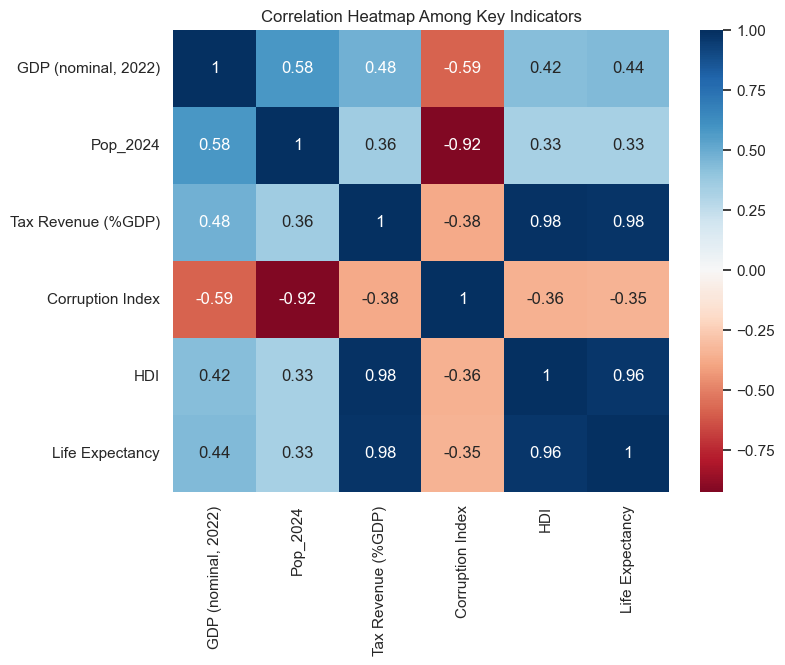

In [11]:
numeric_cols = ["GDP (nominal, 2022)", "Pop_2024", "Tax Revenue (%GDP)", "Corruption Index", "HDI", "Life Expectancy"]
# Filter out columns that actually exist
numeric_cols = [col for col in numeric_cols if col in merged_df.columns]

corr_df = merged_df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap Among Key Indicators")
plt.show()

## 8. Transform Data (Wide ↔ Long) & Plot a Line Chart
We already **generated** 5-year population data (`Pop_2020`..`Pop_2024`) in a **wide format** (one row per country, multiple columns for each year).

### Why do we convert to **Long** Format?
- Some **visualizations** (like line charts over time) are **much easier** if each row is `(Country, Year, Population)`.  
- Tools like **Seaborn** can handle time-series data more **naturally** in **long** format.  
- For **multi-year** data, **long** format helps with grouping or pivoting by year.

### Let’s do it!
1. **Melt** from wide to long.
2. Demonstrate a line chart for the **top 10** most populous countries in 2024.
3. Pivot back to wide if needed.


Population in Long Format:


,Country,Year,Population
0,Afghanistan,2020,38952362.0
1,Albania,2020,2656908.0
2,Algeria,2020,44247363.0
3,Andorra,2020,77021.0
4,Angola,2020,36207589.0
5,Antigua and Barbuda,2020,85762.0
6,Argentina,2020,42118899.0
7,Armenia,2020,2797120.0
8,Australia,2020,24609687.0
9,Austria,2020,8672248.0



Population (re-pivoted to wide):


Year,Country,2020,2021,2022,2023,2024
0,Afghanistan,38952362.0,39819290.0,40979523.0,41457853.0,42647492.0
1,Albania,2656908.0,2666002.0,2696153.0,2722313.0,2791765.0
2,Algeria,44247363.0,44270514.0,45522677.0,45648436.0,46814308.0
3,Andorra,77021.0,77432.0,78425.0,80405.0,81938.0
4,Angola,36207589.0,36450145.0,36713739.0,37105125.0,37885849.0
5,Antigua and Barbuda,85762.0,87522.0,89953.0,92209.0,93772.0
6,Argentina,42118899.0,43169106.0,43466373.0,44654613.0,45696159.0
7,Armenia,2797120.0,2862370.0,2890927.0,2959801.0,2973840.0
8,Australia,24609687.0,24622063.0,25207528.0,25930310.0,26713205.0
9,Austria,8672248.0,8745524.0,8770771.0,9028700.0,9120813.0


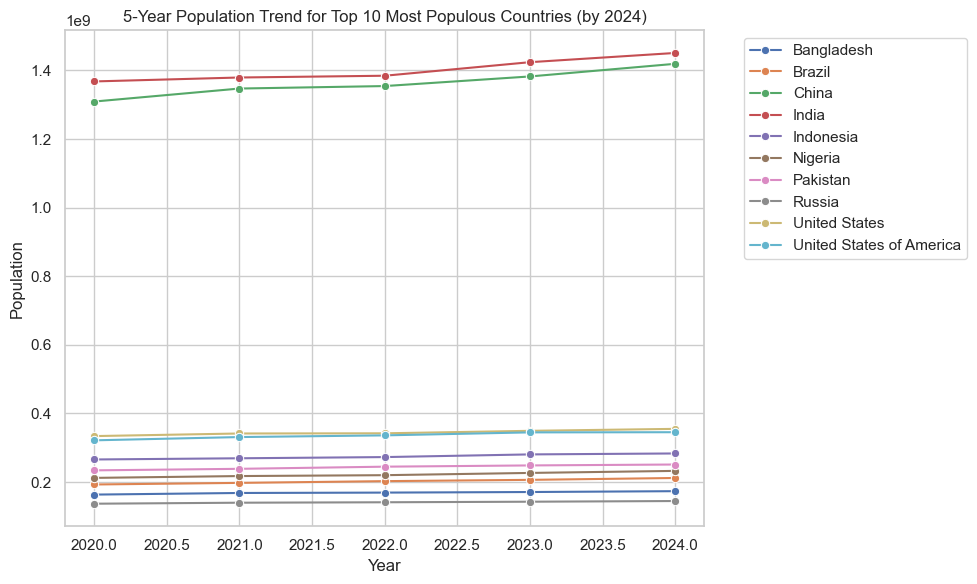

In [12]:
pop_cols = [f'Pop_{yr}' for yr in range(2020, 2025)]
id_vars = [col for col in merged_df.columns if col not in pop_cols]

pop_long = merged_df.melt(
    id_vars=id_vars,
    value_vars=pop_cols,
    var_name='Year',
    value_name='Population'
)
pop_long['Year'] = pop_long['Year'].str.replace('Pop_', '', regex=False).astype(int)

print("\nPopulation in Long Format:")
display(pop_long[['Country','Year','Population']].head(10))

# Pivot back to wide just to show the round trip
pop_wide = pop_long.pivot(index='Country', columns='Year', values='Population').reset_index()
print("\nPopulation (re-pivoted to wide):")
display(pop_wide.head(10))

# Plot a line chart for the 10 most populous countries in 2024
pop_wide_2024 = pop_wide[['Country', 2024]].sort_values(by=2024, ascending=False).head(10)
top10_countries = pop_wide_2024['Country'].values

top10_df = pop_long[pop_long['Country'].isin(top10_countries)]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=top10_df,
    x='Year',
    y='Population',
    hue='Country',
    marker='o'
)
plt.title("5-Year Population Trend for Top 10 Most Populous Countries (by 2024)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 9. Outlier Detection
We’ll **remove** extreme outliers in **`GDP (nominal, 2022)`** using the **Interquartile Range** (IQR) method, so we can focus on typical countries in the final metric.

In [13]:
filtered_df = merged_df.copy()

if 'GDP (nominal, 2022)' in filtered_df.columns:
    Q1 = filtered_df['GDP (nominal, 2022)'].quantile(0.25)
    Q3 = filtered_df['GDP (nominal, 2022)'].quantile(0.75)
    IQR = Q3 - Q1

    cond = (filtered_df['GDP (nominal, 2022)'] >= (Q1 - 1.5 * IQR)) & (filtered_df['GDP (nominal, 2022)'] <= (Q3 + 1.5 * IQR))
    filtered_df = filtered_df[cond]
    print("Outlier filtering applied on 'GDP (nominal, 2022)'.")
else:
    print("No 'GDP (nominal, 2022)' column detected.")

print("Remaining rows after outlier filter:", len(filtered_df))

Outlier filtering applied on 'GDP (nominal, 2022)'.
Remaining rows after outlier filter: 157


## 10. Global Development Score
### What Does It Represent?
Our **Global Development Score** is a **single number** that tries to capture multiple dimensions:
- **HDI** (0.3–0.95, higher is better)
- **Corruption Index** (1–100, higher => less corrupt => better)
- **Tax Revenue** (5%–50%, we assume moderate/high is beneficial for funding public services)
- **GDP** (nominal, 2022) on a **log scale** (to avoid extremes overshadowing smaller countries)

### Why Do We Care?
1. One metric (like GDP alone) can be **misleading**.
2. Combining multiple indicators provides a more **holistic** measure.
3. Real organizations (like the UN) build composite indexes to **rank and compare** countries globally.

### Our Plan
We'll do a **naive weighting**:
- 40% from HDI
- 25% from Corruption Index
- 15% from log10(GDP)
- 20% from Tax Revenue (%GDP)

> **Note**: This is only for demonstration. Real weighting would require domain expertise.

In [14]:
final_df = filtered_df.copy()

def compute_dev_score(row):
    hdi = row.get("HDI", 0)
    corr_idx = row.get("Corruption Index", 0)
    gdp_nominal = row.get("GDP (nominal, 2022)", 0)
    tax_rev = row.get("Tax Revenue (%GDP)", 0)

    # Normalize HDI ~ (0.3..0.95)
    norm_hdi = (hdi - 0.3) / (0.95 - 0.3)
    norm_hdi = min(max(norm_hdi, 0), 1)

    # Normalize Corruption Index (1..100)
    norm_corr = (corr_idx - 1) / (99)
    norm_corr = min(max(norm_corr, 0), 1)

    # Use log10 GDP to reduce extremes (9..14 typical range for big economies)
    if gdp_nominal <= 0:
        norm_gdp = 0
    else:
        log_gdp = np.log10(gdp_nominal)
        norm_gdp = (log_gdp - 9) / (14 - 9)
        norm_gdp = min(max(norm_gdp, 0), 1)

    # Tax Revenue (5..50)
    norm_tax = (tax_rev - 5) / (45)
    norm_tax = min(max(norm_tax, 0), 1)

    # Weighted sum
    score = 0.40 * norm_hdi + 0.25 * norm_corr + 0.15 * norm_gdp + 0.20 * norm_tax
    return score

final_df["Global Dev Score"] = final_df.apply(compute_dev_score, axis=1)
display(final_df[["Country", "GDP (nominal, 2022)", "Corruption Index", "HDI", "Tax Revenue (%GDP)", "Global Dev Score"]].head(5))

,Country,"GDP (nominal, 2022)",Corruption Index,HDI,Tax Revenue (%GDP),Global Dev Score
1,Albania,1.888210e+10,100.00,0.464,17.15,0.443205
2,Algeria,1.919130e+11,87.32,0.586,25.47,0.553451
3,Andorra,3.352033e+09,100.00,0.334,9.24,0.305527
4,Angola,1.067140e+11,86.46,0.522,23.04,0.493448
5,Antigua and Barbuda,1.757604e+09,100.00,0.350,6.62,0.295317


### 10.1 Rank Countries by Global Development Score
This **final step** makes the tutorial **meaningful**: we see which countries stand out.
We’ll show the top 10 plus a quick bar chart to visualize it.

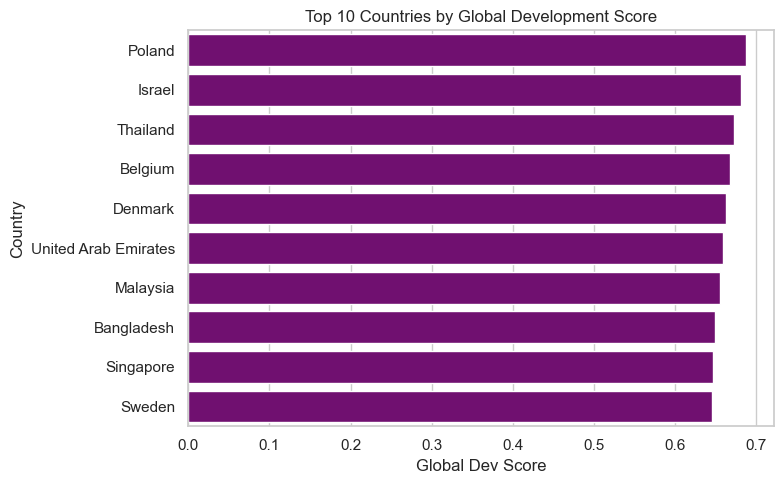

,Country,Global Dev Score,HDI,Corruption Index
146,Poland,0.687388,0.718,94.44
87,Israel,0.681657,0.678,100.00
184,Thailand,0.672497,0.679,99.99
16,Belgium,0.667145,0.663,100.00
49,Denmark,0.663084,0.668,100.00
195,United Arab Emirates,0.659400,0.680,93.66
109,Malaysia,0.655223,0.667,100.00
13,Bangladesh,0.649184,0.689,89.00
165,Singapore,0.646871,0.669,94.75
179,Sweden,0.645326,0.670,90.24


In [15]:
top10_dev = final_df.sort_values("Global Dev Score", ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top10_dev["Global Dev Score"],
    y=top10_dev["Country"],
    color="purple"
)
plt.title("Top 10 Countries by Global Development Score")
plt.xlabel("Global Dev Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

display(top10_dev[["Country", "Global Dev Score", "HDI", "Corruption Index"]])

## 11. Conclusion & Takeaways
By following this **step-by-step** data wrangling project:
1. We **read** two raw datasets (`country_data.csv`, `country_gdp.csv`).
2. We **cleaned** string-formatted columns into numeric types.
3. We **handled** missing values with strategies like filling medians or dropping crucial columns.
4. We **merged** the datasets and **visualized** them (top countries by population, by GDP, etc.).
5. We **generated** 5-year population data (`Pop_2020`..`Pop_2024`) for each country, then showed how to pivot wide ↔ long and plotted a line chart.
6. We **added** synthetic columns (Corruption Index, HDI, etc.) **proportionate** to GDP and population, giving more realistic relationships.
7. We **plotted** a correlation heatmap to see how these new features relate.
8. We **filtered** out GDP outliers using IQR.
9. We **computed** a **Global Development Score** combining multiple indicators.
10. We **ranked** countries, providing a more **holistic** measure of development than GDP alone.

### Why This Matters
- **Holistic metrics** often reveal **nuances**: a country might have high GDP but poor life expectancy or a high corruption level.
- **Composite indexes** are common in economics (e.g., HDI, Prosperity Index, etc.).
- This approach demonstrates how to handle **dirty data** while also delivering **meaningful** final insights for real-world users.

Feel free to tweak weights, columns, or outlier handling to suit your domain. **Happy learning!**

In [16]:
# Optionally, save final_df to a new CSV with synthetic columns + dev score
final_df.to_csv("enhanced_country_economic_data.csv", index=False)
print("Tutorial completed! 'enhanced_country_economic_data.csv' saved.")

Tutorial completed! 'enhanced_country_economic_data.csv' saved.


# Frequently Asked Questions (FAQ)

## Conceptual / Data-Wrangling FAQs
1. **Why do we need to clean the data if it’s only for learning?**  
   Even in a learning scenario, realistic data typically comes with **inconsistencies** (commas, dollar signs, missing values). Cleaning ensures everyone experiences how **real-world** workflows handle messy or incomplete data.

2. **Why do we use an outer merge instead of an inner merge?**  
   - **Outer merge** keeps **all countries** from both datasets, highlighting which ones appear in only one file.  
   - **Inner merge** would exclude countries not common to both datasets.  
   In practice, you pick based on whether you need the **full picture** (outer) or only **matched records** (inner).

3. **What if we want a more accurate method of handling missing values than simple fill or drop?**  
   - You could use **imputation** (e.g., mean/median for numeric data, mode for categorical) or **predictive modeling** (like regression or KNN).  
   - The choice depends on **domain knowledge** and how large/important the missing portion is.

4. **Why do we demonstrate data transformation (wide ↔ long)?**  
   - **Long format** is often **easier** for time-series analysis and plotting.  
   - **Wide format** can be better for **side-by-side comparison**.  
   Showing both highlights how you can **reshape** data to suit your analysis or visualization needs.

5. **Why generate synthetic data (Corruption Index, HDI, etc.) if real values might exist?**  
   - In many cases, **real data** is sensitive, proprietary, or simply unavailable. Synthetic data:
     - **Preserves** the structure/process of real data wrangling.
     - **Demonstrates** advanced concepts (like proportional relationships).
     - **Avoids** confidentiality issues.

6. **How did you decide the proportional relationships for synthetic data?**  
   - The relationships (e.g., higher GDP => higher tax revenue, bigger population => lower corruption index) are **simplified** assumptions.  
   - Real data relationships are **far more complex**. We merely mimic potential trends to make the dataset feel more **plausible**.

7. **Why use a log scale for GDP when computing the Global Development Score?**  
   - GDP values can vary by **orders of magnitude** (e.g., from millions to trillions).  
   - **Taking the log** reduces the **extreme range**, preventing the largest economies from overpowering the rest.

8. **Can I change the weights used in the Global Development Score?**  
   - Yes! They’re purely **demonstrative** (40% HDI, 25% Corruption Index, etc.).  
   - In real-world scenarios, domain experts decide (or debate) the **optimal weighting**.

9. **Why did we use the Interquartile Range (IQR) method for outlier detection?**  
   - **IQR** is a **simple, robust** technique that’s easy to implement.  
   - Other methods include **Z-score** thresholds, **percentile cuts**, or **domain-specific** logic.  
   - The best approach depends on **context** and the shape of your data.

10. **What if I want to do deeper analysis after creating the Global Development Score?**  
   - You can do **further visualizations** (e.g., correlation heatmaps with the new score), **clustering** countries by score range, or compare your score with **existing** indexes like the UN HDI.  
   - The sky’s the limit once your data is **clean** and your new features are in place!

## Running / Technical FAQs
1. **Why do I get `FileNotFoundError: [Errno 2] No such file or directory: 'country_data.csv'`?**  
   - The CSV files (**`country_data.csv`** and **`country_gdp.csv`**) must be in the **same directory** as the notebook.  
   - Make sure you **download** or place them in the exact folder or specify the **correct relative path**.

2. **What if I get `ModuleNotFoundError: No module named 'faker'` or `'seaborn'`?**  
   - The notebook uses **Faker**, **Seaborn**, and other libraries. Install them via pip or conda, for example:  
     ```bash
     pip install faker seaborn
     ```
   - In Jupyter, you can also run `!pip install faker seaborn` in a cell.

3. **Why am I getting warnings like `FutureWarning` or `UserWarning` from Seaborn?**  
   - Seaborn occasionally updates, deprecating old parameter usage (e.g., using `palette` without `hue`).  
   - These **warnings** typically don’t break the code. To remove them, either **upgrade** Seaborn or adjust the code to follow newer usage guidelines.

4. **I see a `ValueError` when converting string columns to numeric (e.g., `'2,115,111'`).**  
   - Make sure the code that **removes commas** (`.str.replace(",", "")`) runs **before** calling `.astype(int)` or `pd.to_numeric(...)`.  
   - This is usually included in the notebook, but if you run cells **out of order** it might cause errors. Run from top to bottom in sequence.

5. **Why is my chart missing or showing empty?**  
   - Check that you’ve run **all** previous cells that create or update data (especially the synthetic columns or multi-year population).  
   - If you skip a step, the dataset might be empty or incomplete.

6. **My environment doesn't have the right Python version.**  
   - The notebook is tested on **Python 3.9** (or 3.7+). If you’re on an older version, consider upgrading or creating a virtual environment that meets requirements.

7. **I get an error `KeyError: 'Pop_2024'` when generating multi-year data.**  
   - Ensure the earlier part of the code reading **`country_data.csv`** and cleaning population columns has run.  
   - If your CSV doesn’t actually contain `"Population (2024)"` (typo?), the code referencing that column will fail. Update column names as needed.

8. **`TypeError` or `ValueError` during the merging step**  
   - Possibly you have conflicting column types or unexpected columns. Confirm your CSVs **match** the notebook’s expected structure (e.g., `Country` spelled consistently).

9. **I see weird characters or `UnicodeDecodeError`**  
   - This sometimes happens if the CSV uses a different encoding. Try specifying an encoding in `pd.read_csv("file.csv", encoding="utf-8")`.

10. **How do I save my results or share them?**  
   - The final cell exports to **`enhanced_country_economic_data.csv`**. You can also manually export from Jupyter’s “File” menu or push the files to a **Git** repository.  
   - The `.ipynb` file itself is shareable, but your collaborators will also need the same CSV files to run it fully.
